In [1]:
# Import numpy and matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Function to parse each line in txt file into numpy array.  Input is a file path to the txt file
def text_gen(file):
    # Open and separate text into array
    text = open(file)
    text_contents = text.read()
    sep_text = np.array(text_contents.splitlines())
    return np.array(sep_text)

In [3]:
# Testing the text array function
t = "C:/Users/matthew.meers/Desktop/test_game_1.txt"
text_gen(t)


array(['', 'Game #56525448, unrated.', '',
       'Kingdom generated with these relative percentages:',
       "0%: Possession, Mastermind, Keep, Trade, Philosopher's Stone, Swindler, Delve and Fool's Gold",
       '50%: Way of the Mouse, Invest, Crop Rotation, Doctor, Silk Road, Road Network, Transmute, Tax and Venture',
       '', 'u starts with 7 Coppers.', 'u starts with 3 Estates.',
       'L starts with 7 Coppers.', 'L starts with 3 Estates.',
       'u shuffles their deck.', 'u draws 3 Coppers and 2 Estates.',
       'L shuffles their deck.', 'L draws 5 cards.', '',
       'Turn 1 - uiop119', 'u plays 3 Coppers. (+$3)',
       'u buys and gains a Goatherd.', 'u draws 4 Coppers and an Estate.',
       '', 'Turn 1 - Lord Rattington', 'L plays 4 Coppers. (+$4)',
       'L buys and gains a Patron.', 'L draws 5 cards.', '',
       'Turn 2 - uiop119', 'u plays 4 Coppers. (+$4)',
       'u buys and gains a Patron.', 'u shuffles their deck.',
       'u draws 3 Coppers, an Estate and a G

In [6]:
# Input player abbreviation and text array, output index array
def index_array(pn, t_array):
    # Create array which will have the index in the text array where a player starts their turn.
    # n keeps track of the index in the text array
    index = np.array([])
    n = 0
    # Loop through the text array to search for the start of a players turn
    for i in t_array:
        if "- %s" % (pn) in i:
            index = np.append(index,n)
        n = n+1 
    return np.array(index)

In [7]:
# Testing the index array
index_array("L",text_gen(t))

array([ 21.,  32.,  46.,  60.,  77.,  96., 125., 137., 181., 235., 299.,
       380., 434.])

In [8]:
# Input player abbreviation and text array, output turn array
def turn_array(pn, t_array):
    # Create array which will keep track of the turn number
    # k keeps track of the turn number
    turn = np.array([])
    k = 0
    for i in t_array:
        # Loop through the text array to search for the start of a players turn.
        if "- %s" % (pn) in i:
            # k only increses if the the player is starting their turn
            k = k + 1
            turn = np.append(turn, k)
    return np.array(turn)

In [9]:
# Testing the turn array
turn_array("L",text_gen(t))

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.])

In [10]:
# Input index array and text array, output money array
def money_array(pn,index, t_array):
    # Array which keeps track of total money in a single player's deck.  Players start with a total of 7.
    money = np.array([7.0])
    # p is keeping track of where the loop is in the index array. 
    # Adjacent entries in the index array correspond to a single game round where each player takes a turn
    p=0
    while p < len(index)-1:
        # turn_total keeps track of total money gained this turn
        turn_total = 0
        # Checks text array for gains of copper, silver, and gold only on a single game round 
        #(via adjacent entries in the index array)
        for i in t_array[np.int(index[p]):np.int(index[p+1])]:
            # Check if line in text is null. If it is ignore it, if not use it to check for player name and treasure
            if i != "":
                # Checks the first letter of the text line for the player you are trying to track money for
                if i[0] == "%s" % (pn):
                    if "gains a Silver" in i:
                        turn_total = turn_total +2
                    elif "gains a Gold" in i:
                        turn_total = turn_total +3
                    elif "gains a Copper" in i:
                        turn_total = turn_total +1
        p = p + 1
        # Add the amount of money gained this turn to the total money in the deck before this turn.  Append it to the money array
        money = np.append(money,money[len(money)-1]+turn_total)
    return np.array(money)

In [11]:
# Testing the money array
money_array("u",index_array("u",text_gen(t)),text_gen(t))

array([ 7.,  7.,  7.,  9.,  9.,  9.,  9., 11., 11., 11., 11., 11., 11.])

In [12]:
# Input player abbreviation and filepath, output plot of total money vs turn number
def money_graph(pn, file):
    # Make the index and turn arrays
    index = index_array(pn,text_gen(file))
    turn = turn_array(pn,text_gen(file))
    # Making array for total deck money starting with the $7 coppers on turn 0
    money = money_array(pn,index,text_gen(file))
    # Make the plot with labels
    a = plt.step(turn,money)
    plt.xlabel("Turn number")
    plt.ylabel("Total Money in Deck")
    plt.style.use('default')
    return a

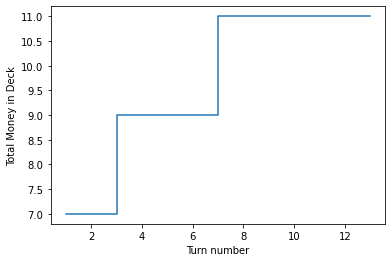

In [13]:
# Testing the total money vs turn number graph
money_graph("u",t)

In [14]:
# Input a list of player abbreviations and text file.  Output total money vs turn graph for each player on one plot.
def multi_player_money_graph(player_array,file):
    # Looping through each player
    for i in player_array:
        money_graph(i,file)
    plt.legend(player_array)

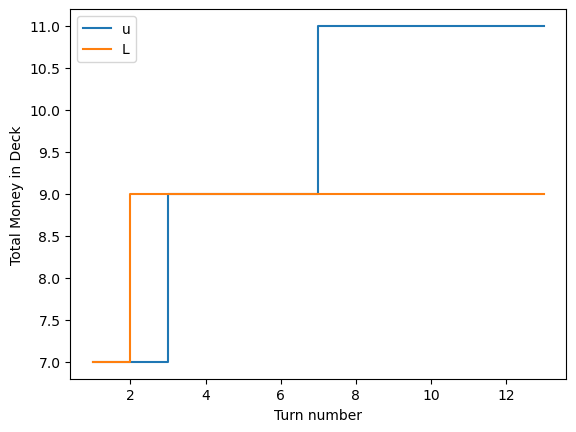

In [29]:
# Testing the multiplayer money graph
multi_player_money_graph(["u","L"],t)

In [30]:
# Now I would like to be able to plot total deck size as a funciton of turn #.
# We can already parse the text into each game round so all we have to do is look for "gain" in each round and check who gained the card
text = text_gen(t)
# This will be an array of the index in the text where gains occur
gain = np.array([])
n = 0
for i in text:
    if "gains" in i:
        gain = np.append(gain, n)
    n = n+1

In [31]:
# Testing the gain index array
gain

array([ 18.,  23.,  28.,  34.,  43.,  48.,  56.,  65.,  74.,  79.,  92.,
       110., 122., 127., 133., 156., 176., 177., 192., 230., 231., 262.,
       267., 295., 334., 335., 336., 372., 375., 376., 408., 430., 431.,
       465., 466.])

In [32]:
# Putting the above cell in a funciton.  Input is text file, output is lines/index where gains occur in the text
def gain_index(text):
    txt = text_gen(text)
    gain = np.array([])
    n = 0 
    for i in txt:
        if "gains" in i:
            gain = np.append(gain,n)
        n = n + 1
    return gain

In [33]:
# Testing the gain_index function
a = np.array(gain_index(t))
for i in a:
    print(text_gen(t)[np.int(i)])

u buys and gains a Goatherd.
L buys and gains a Patron.
u buys and gains a Patron.
L buys and gains a Silver.
u buys and gains a Silver.
L buys and gains a Sanctuary.
u buys and gains a Sanctuary.
L buys and gains a Patron.
u buys and gains a Barge.
L buys and gains a Barge.
u buys and gains a Lighthouse.
L buys and gains a Sanctuary.
u buys and gains a Silver.
L buys and gains a Barge.
u buys and gains a Barge.
L buys and gains a Barge.
u buys and gains a Barge.
u buys and gains a Lighthouse.
L buys and gains a Laboratory.
u gains 3 Golds.
u buys and gains a Laboratory.
L gains 3 Golds.
L buys and gains a Laboratory.
u buys and gains 2 Laboratories.
L gains 3 Golds.
L buys and gains a Laboratory.
L buys and gains a Province.
u gains 3 Golds.
u buys and gains a Province.
u buys and gains a Laboratory.
L buys and gains 3 Provinces.
u buys and gains a Province.
u buys and gains 2 Duchies.
L buys and gains 2 Provinces.
L buys and gains an Estate.


In [40]:
# Input player abbreviation, index array, and text array. Output total deck size array
def deck_size_array(pn,index, t_array):
    deck = np.array([10.0])
    # p is keeping track of where the loop is in the index array. 
    # Adjacent entries in the index array correspond to a single game round where each player takes a turn 
    p=0
    while p < len(index)-1:
        # turn_total keeps track of total cards gained this turn
        turn_total = 0
        # Checks text array for gains and trashes only on a single game round 
        #(via adjacent entries in the index array)
        for i in t_array[np.int(index[p]):np.int(index[p+1])]:
            # Check if line in text is null. If it is ignore it, if not use it to check for player name and gains/trashing
            if i != "":
                # Check the first letter of the text line for the player you are trying to track deck size for
                if i[0] == "%s" % (pn):
                    # Change the total number of cards gained or lost in this turn based on the text in the game log
                    if "gains a" in i:
                        turn_total = turn_total +1
                    elif "gains 2" in i:
                        turn_total = turn_total +2
                    elif "gains 3" in i:
                        turn_total = turn_total +3
                    elif "trashes an" in i:
                        turn_total = turn_total - 1
                    elif "trashes 2" in i:
                        turn_total = turn_total - 2
                    elif "trashes 3" in i:
                        turn_total = turn_total - 3
        p = p + 1
        # Add the amount of cards gained/lost this turn to the total amount of cards in the deck before this turn.
        # Append it to the deck size array
        deck = np.append(deck,deck[len(deck)-1]+turn_total)
    return np.array(deck)

In [41]:
# Testing total deck size array function
deck_size_array("u",index_array("u",text_gen(t)),text_gen(t))

array([10., 11., 12., 12., 13., 14., 15., 15., 16., 18., 22., 24., 29.])

In [42]:
# Final product for deck size
def deck_graph(pn, file):
    # Make the index and turn arrays
    index = index_array(pn,text_gen(file))
    turn = turn_array(pn,text_gen(file))
    # Making array for total deck size starting with the 10 cards on turn 0
    size = deck_size_array(pn,index,text_gen(file))
    a = plt.step(turn,size)
    plt.xlabel("Turn number")
    plt.ylabel("Total Cards in Deck")
    return a

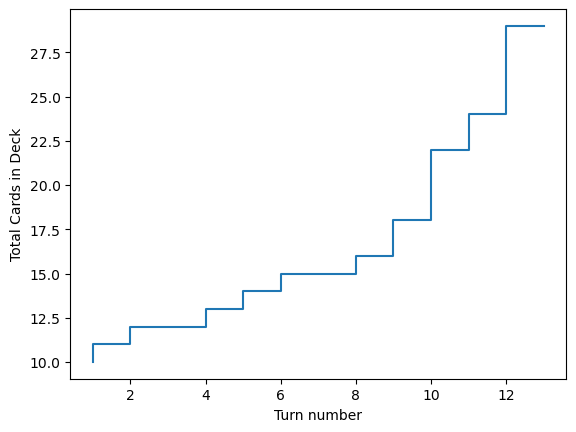

In [43]:
# Testing deck size vs turn number function
deck_graph("u",t)

In [44]:
# Deck size graph for multiple players
def multi_player_deck_graph(player_array,file):
    a = player_array
    for i in a:
        deck_graph(i,file)
    plt.legend(player_array)

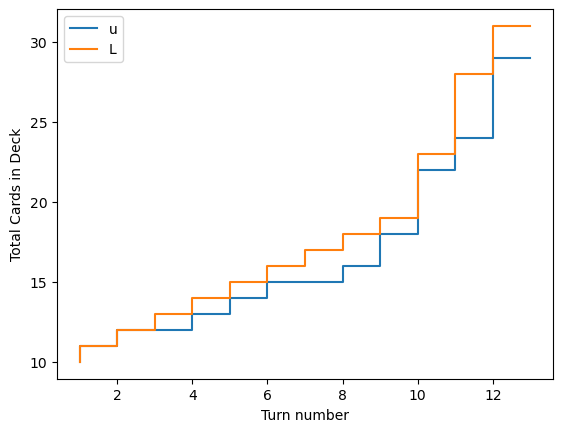

In [45]:
# Testing multiplayer deck size vs turn number graph
multi_player_deck_graph(["u","L"],t)